# Bidding Prediction

# 1. Obtain and review raw data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

w[0]: 0.393906  b: -0.031804


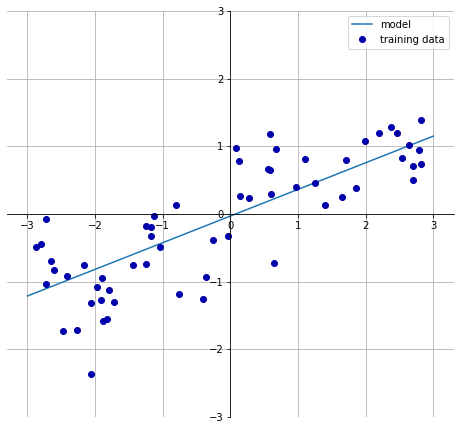

In [2]:
mglearn.plots.plot_linear_regression_wave()

# Data

In [4]:
df = pd.read_csv('biddings.csv',index_col=0)

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,convert
0,,,,,,,,,,,,,,,,,,,,,
-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000000 entries, -0.01 to -0.01
Data columns (total 88 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   1        1000000 non-null  float64
 1   2        1000000 non-null  float64
 2   3        1000000 non-null  float64
 3   4        1000000 non-null  float64
 4   5        1000000 non-null  float64
 5   6        1000000 non-null  float64
 6   7        1000000 non-null  float64
 7   8        1000000 non-null  float64
 8   9        1000000 non-null  float64
 9   10       1000000 non-null  float64
 10  11       1000000 non-null  float64
 11  12       1000000 non-null  float64
 12  13       1000000 non-null  float64
 13  14       1000000 non-null  float64
 14  15       1000000 non-null  float64
 15  16       1000000 non-null  float64
 16  17       1000000 non-null  float64
 17  18       1000000 non-null  float64
 18  19       1000000 non-null  float64
 19  20       1000000 non-null  float64
 20

Our data consists of 88 columns where all the values are not null.

In [7]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,convert
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-0.000817,0.000731,-0.000602,-0.000907,-0.001622,-0.001113,-0.000849,-0.000038,0.001315,-0.000326,...,-0.000268,-0.000196,-0.000226,-0.000953,-0.000306,0.000146,-0.000700,-0.000626,0.000132,0.001908
std,2.940689,2.474237,2.031199,1.710268,1.554487,1.529738,1.487838,1.474423,1.435716,1.413214,...,0.757660,0.759999,0.759698,0.751190,0.745389,0.742625,0.667258,0.639425,0.649761,0.043639
min,-28.470000,-20.050000,-1.550000,-17.930000,-14.980000,-8.280000,-41.790000,-49.710000,-12.710000,-7.590000,...,-9.660000,-4.510000,-5.380000,-5.790000,-3.670000,-5.180000,-4.250000,-15.110000,-30.370000,0.000000
25%,-1.220000,-2.070000,-0.600000,-0.670000,-0.010000,-0.160000,-0.510000,-0.280000,-0.390000,-0.390000,...,-0.140000,-0.490000,-0.470000,-0.250000,-0.180000,-0.170000,-0.240000,-0.250000,-0.090000,0.000000
50%,1.130000,1.380000,-0.380000,0.470000,0.190000,0.090000,0.090000,-0.090000,0.100000,-0.090000,...,0.010000,-0.040000,-0.020000,0.000000,0.000000,0.000000,-0.060000,0.060000,-0.020000,0.000000
75%,2.050000,2.340000,-0.080000,0.850000,0.410000,0.380000,0.490000,0.290000,0.460000,0.160000,...,0.130000,0.470000,0.500000,0.230000,0.260000,0.150000,0.070000,0.270000,0.080000,0.000000
max,3.190000,3.150000,14.030000,2.410000,4.580000,4.040000,6.650000,8.700000,22.870000,35.970000,...,16.340000,4.530000,6.100000,5.800000,3.680000,5.060000,5.150000,15.250000,42.570000,1.000000


The "convert" column contains the minimum value of 0 and the maximum value of 1.

In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# biddings.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('biddings.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'biddings.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 89 columns


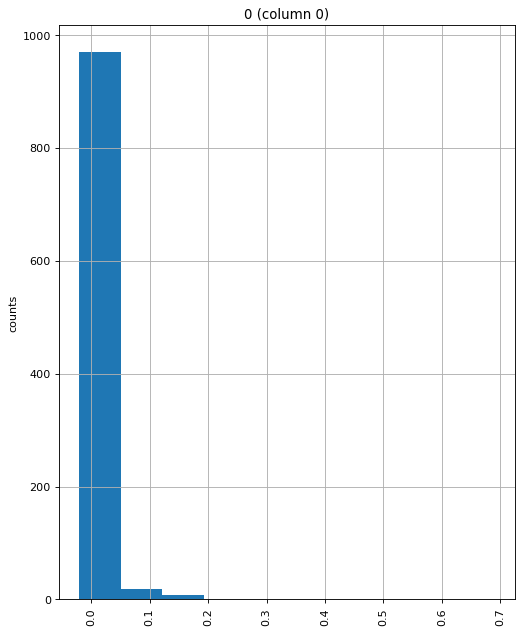

In [12]:
plotPerColumnDistribution(df1, 10, 5)

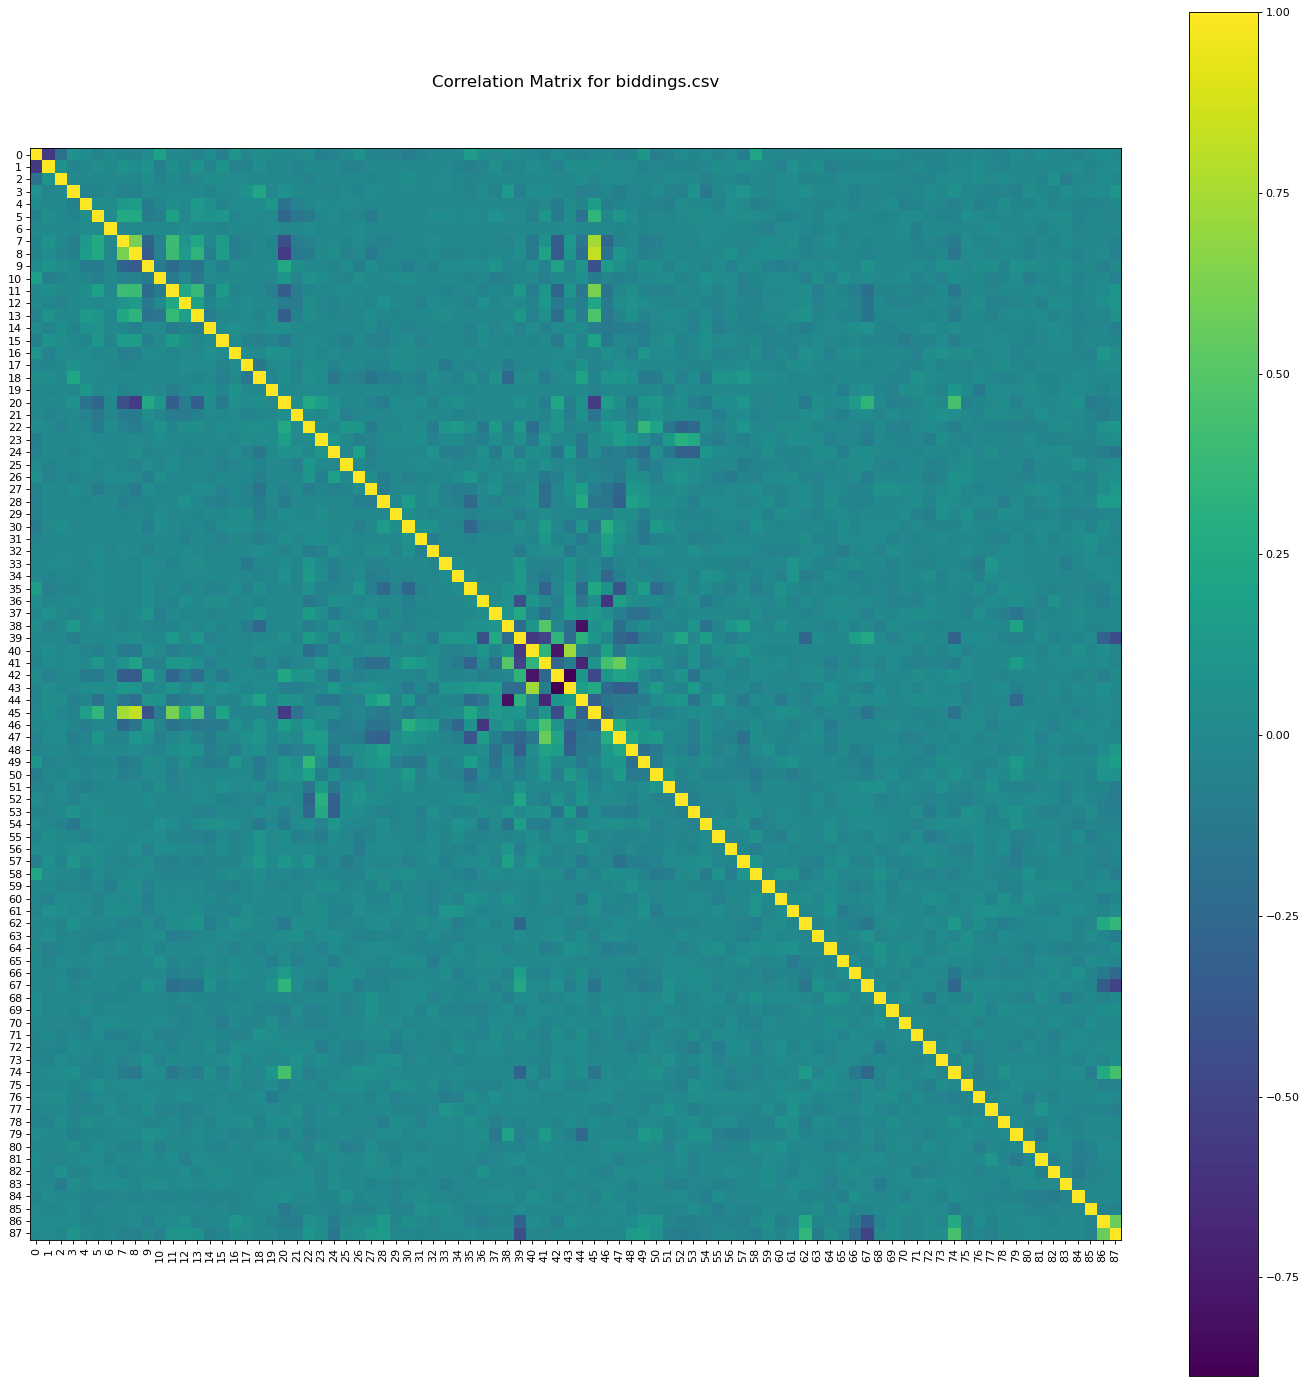

In [13]:
plotCorrelationMatrix(df1, 22)

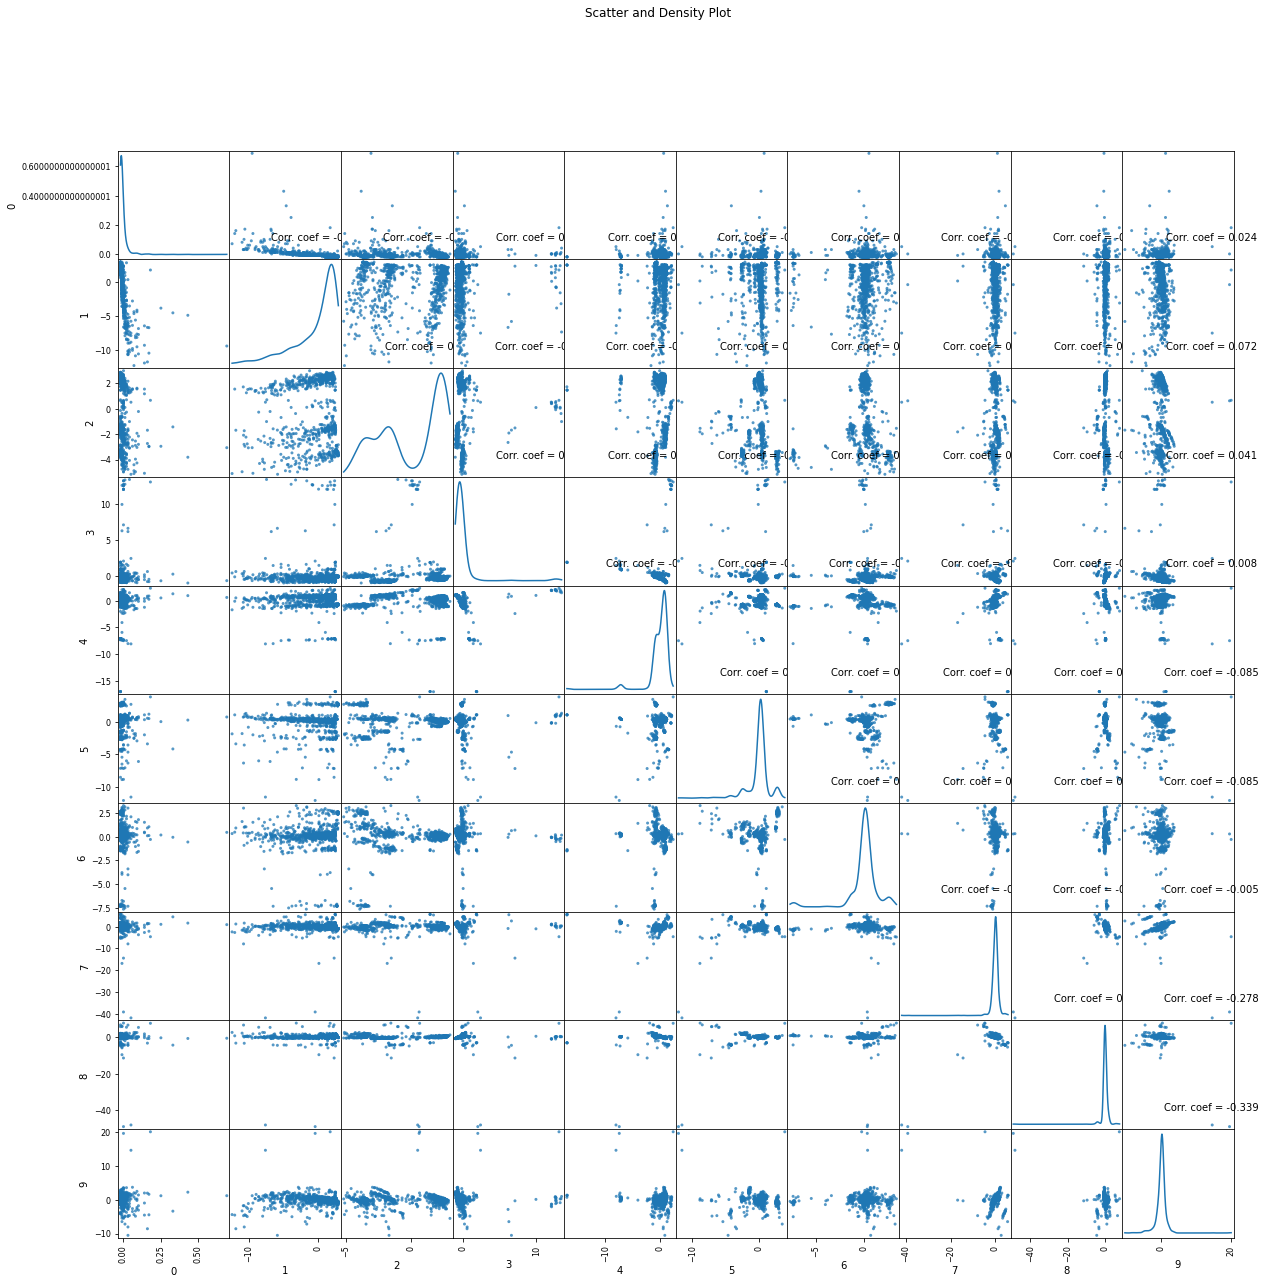

In [14]:
plotScatterMatrix(df1, 20, 10)

# Model

Let's build our model by importing it from sklearn library

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()     #initializing the model

In [18]:
df

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,convert
0,,,,,,,,,,,,,,,,,,,,,
-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,-0.27,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,-0.36,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,-0.97,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,-0.07,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,-0.28,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.01,-2.42,2.00,-0.50,0.55,0.21,0.11,0.15,-0.15,0.77,-0.56,...,0.27,0.35,-1.18,-1.51,-0.00,-0.97,-0.00,-0.44,0.13,0
-0.02,2.84,-3.70,-0.15,-0.67,2.65,2.59,-0.85,-0.21,-0.68,-0.16,...,-0.10,0.88,0.50,-0.05,-0.89,-0.04,0.17,0.12,-0.01,0
-0.01,-0.29,-1.90,-0.81,1.02,0.42,0.13,0.79,-0.58,0.60,-0.27,...,0.03,-1.04,-0.35,0.17,0.36,0.08,-0.10,-0.05,0.01,0


# Split the data

We need to split the data in train and test set to evaluate how our model is doing with the new data.

In [20]:
X = df.drop('convert',axis=1)
y = df['convert']

In [21]:
y.head()

0
-0.01    0
 0.00    0
 0.01    0
-0.02    0
-0.01    0
Name: convert, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training the model

Now we can train the linear regression on train set

In [24]:
model = LogisticRegression()     #initializing the model

In [25]:
model.fit(X_train,y_train)

E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction

In [26]:
pred = model.predict(X_test)

In [27]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [28]:
model.score(X_train,y_train)

0.9980875

In [29]:
model.score(X_test,y_test)

0.99811

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

0.00189

Conclusion: By using logistic regression model, the test accuracy is coming out to be 99.81% which is pretty well.